In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
# Faz este append para poder importar o fitness_function que está na pasta acima
sys.path.append('../')
sys.path.append('../model')

from fitness_function import RocketFitness, bound_values, fitness_func
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from itertools import product
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid


In [2]:
# Load the data
def read_json_file(path):
    with open(path, 'r') as f:
        list_dict_alg = json.load(f)
    return list_dict_alg

path = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/depso_best_model.json'
dict_alg = read_json_file(path)


In [3]:

def filter_limits(dict_alg, limit_fitness_calls, exec_time_limit):


    # Encontra o indice do melhor indivíduo dentro dos limites estabelecidos

    print(dict_alg['best_ind_list'])
    best_ind_list = np.array(dict_alg['best_ind_list'])
    avg_ind_list = np.array(dict_alg['avg_ind_list'])
    fitness_calls_list = np.array(dict_alg['fitness_calls'])
    exec_time_list = np.array(dict_alg['exec_time_list'])
    total_time = dict_alg['total_time']

    mask = (fitness_calls_list <= limit_fitness_calls) & (exec_time_list <= exec_time_limit)

    best_ind_list = best_ind_list[mask]
    avg_ind_list = avg_ind_list[mask]
    fitness_calls_list = fitness_calls_list[mask]
    exec_time_list = exec_time_list[mask]

    #print(best_ind_list.shape)

    # Cria o dataframe
    df = pd.DataFrame(data={'best_ind': best_ind_list, 'avg_fitness': avg_ind_list, 'fitness_calls': fitness_calls_list, 'exec_time': exec_time_list})
    df['total_time'] = total_time

    # Encontra o melhor fitness do best_ind e seu respectivo fitness médio e adiciona as listas
    melhor_fitness = df['best_ind'].max()
    fitness_medio = df[df['best_ind'] == melhor_fitness]['avg_fitness'].values[0]

    
    return df

df = filter_limits(dict_alg[0], np.inf, np.inf)
    

[0.5, 0.5, 0.5, 0.6269084966591489, 0.6164675879826991, 0.6057463776312834, 0.6335307734864839, 0.6331110448330699, 0.638594124727534, 0.6399126185171498, 0.6413937075766575, 0.6429075092350821, 0.6441023963162775, 0.6463866468003544, 0.6468922395364809, 0.6471119246223916, 0.6472232201474067, 0.6472806620471999, 0.6476734517536937, 0.6476067035383866, 0.6475230525922774, 0.6477935080732186, 0.6483736620695562, 0.6485283974302766, 0.6484483860181971, 0.6485202273832282, 0.6485506608020167, 0.6485644872658126, 0.6484309833827627, 0.6485118954817366, 0.6485083882680615, 0.6489687736299993, 0.6487652235505749, 0.6488992019008555, 0.6490336786914186, 0.649053518752658, 0.649080922974815, 0.6490784810487831, 0.6491032033587356, 0.6491363470356514, 0.6491375103858318, 0.6491425145266332, 0.649141990459718, 0.6491389298131346, 0.6491589863905799, 0.6491768491493682, 0.649197163340969, 0.6491877691182408, 0.6492047676425702, 0.6492081782669397]


In [4]:
df = df.loc[df['best_ind'] > 0]
# Cria uma coluna "best_known" com o melhor fitness conhecido, que é um max() cumulativo
df['best_known'] = df['best_ind'].cummax()
# encontra o melhor individuo
best_ind = df['best_ind'].max()
print(best_ind)
# Encontra o número de chamadas de fintess em que o best_ind ocorre a primeira vez
fitness_calls = df.loc[df['best_ind'] == best_ind]['fitness_calls'].values[0]
print( fitness_calls )
# Encontra o índice da linha em que o best_ind ocorre a primeira vez
index = df.loc[df['best_ind'] == best_ind].index[0]


0.6492081782669397
103.0


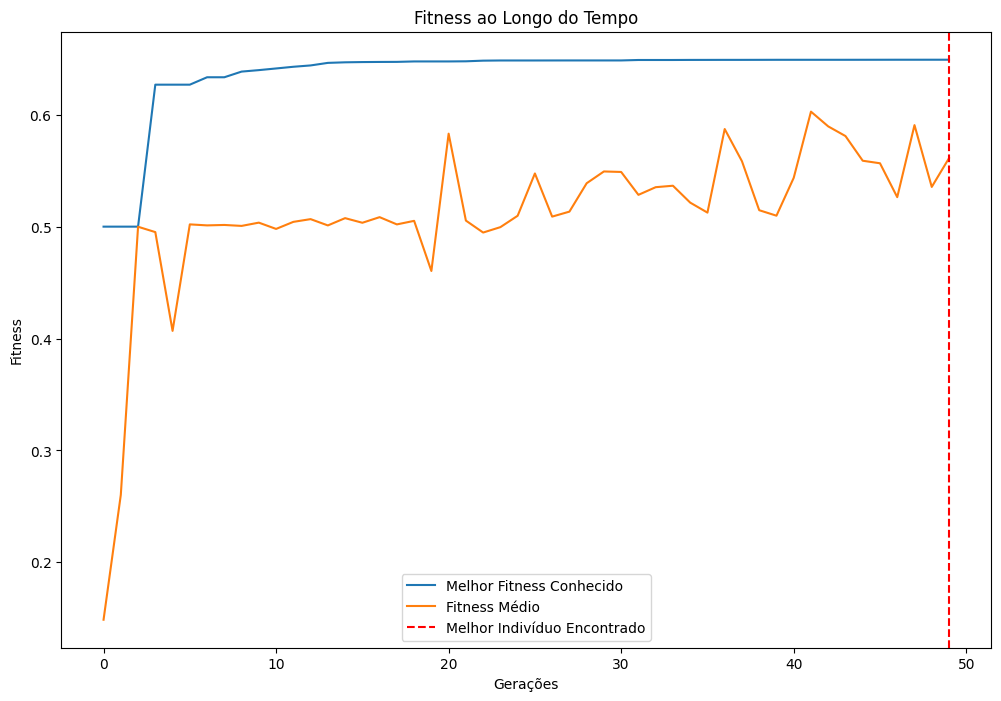

In [5]:
# Faz a visualização do gráfico de treinamento do modelo atraés do dataframe df
# mostrando o best_ind e o avg_fitness ao longo do tempo
plt.figure(figsize=(12, 8))
plt.plot(df['best_known'], label='Melhor Fitness Conhecido')
plt.plot(df['avg_fitness'], label='Fitness Médio')
plt.axvline(index, color='red', linestyle='--', label='Melhor Indivíduo Encontrado')
plt.title('Fitness ao Longo do Tempo')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.legend()
plt.show()

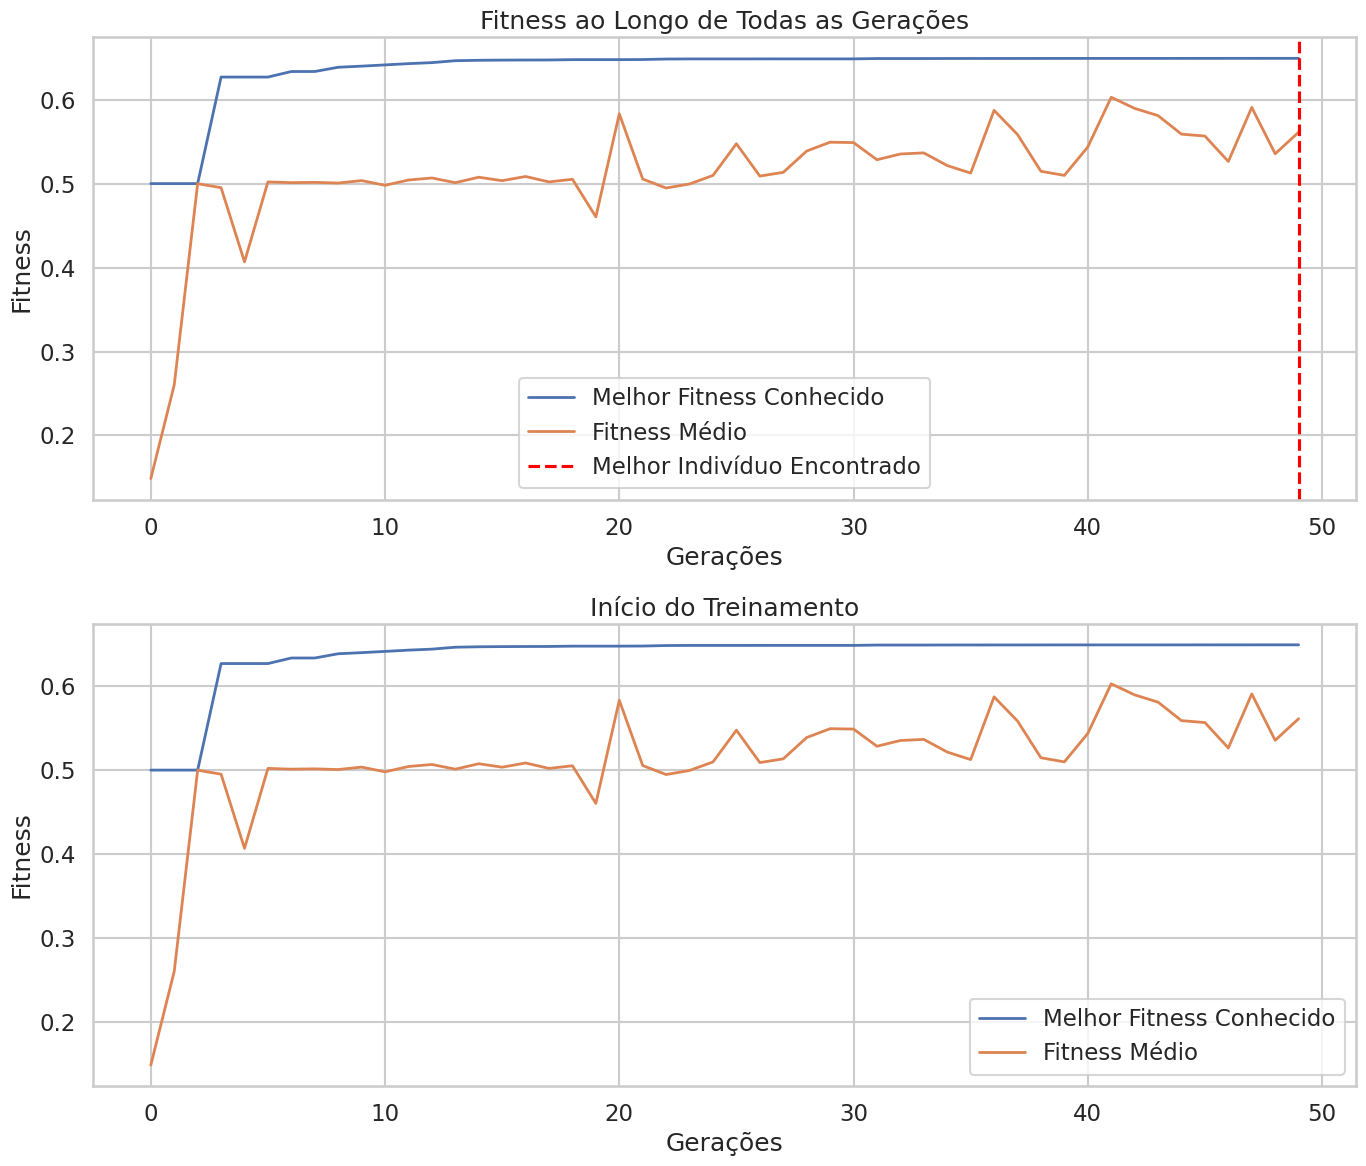

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que df seja o seu DataFrame
# df = pd.read_csv('seu_arquivo.csv') # Exemplo de como carregar o DataFrame

sns.set_theme(context='talk', style='whitegrid') # Configura o tema com Seaborn para um look mais acadêmico

fig, axes = plt.subplots(2, 1, figsize=(14, 12)) # Cria uma figura com duas subfiguras (subplots)

# Plot para o treinamento completo
axes[0].plot(df['best_known'], label='Melhor Fitness Conhecido', linewidth=2)
axes[0].plot(df['avg_fitness'], label='Fitness Médio', linewidth=2)
axes[0].axvline(index, color='red', linestyle='--', label='Melhor Indivíduo Encontrado')
axes[0].set_title('Fitness ao Longo de Todas as Gerações')
axes[0].set_xlabel('Gerações')
axes[0].set_ylabel('Fitness')
axes[0].legend()

# Plot para visualizar apenas o início do treinamento
inicio_treinamento = 100 # Ajuste este valor para quantas gerações você quer visualizar no começo
axes[1].plot(df['best_known'][:inicio_treinamento], label='Melhor Fitness Conhecido', linewidth=2)
axes[1].plot(df['avg_fitness'][:inicio_treinamento], label='Fitness Médio', linewidth=2)
#axes[1].axvline(index if index < inicio_treinamento else -1, color='red', linestyle='--', label='Melhor Indivíduo Encontrado' if index < inicio_treinamento else '')
axes[1].set_title('Início do Treinamento')
axes[1].set_xlabel('Gerações')
axes[1].set_ylabel('Fitness')
axes[1].legend()

plt.tight_layout() # Ajusta automaticamente os subplots para que caibam na figura
plt.show()


In [7]:
dict_alg[0]['best_solutions']
# Encontra a best_solution que está associada ao mesmo número de chamadas de fitness
best_solution = len(dict_alg[0]['best_solutions'])
print(best_solution)

2000


In [8]:
rocket_fitness = RocketFitness(bound_values, num_workers=4)
random_values = np.random.rand(100,10)
fitness_func_class = rocket_fitness.calc_fitness


In [9]:
fitness_val  = fitness_func_class(np.array(dict_alg[0]['best_solutions']))


In [10]:
best_ind_space = np.array(dict_alg[0]['best_solutions'][fitness_val.argmax()])
print(best_ind_space)
print(fitness_val.argmax())

[0.62248232 0.74080154 0.52354334 1.         0.74861045 0.53132592
 0.00281987 0.04587805 0.18141311 0.31425838]
17


In [11]:
min_mat = bound_values.T[0, :]
max_mat = bound_values.T[1,:]
best_sol_denorm = best_ind_space * (max_mat - min_mat) + min_mat
print(best_sol_denorm)
# Printa o que é cada valor
print("Comb Pressure (Superior): ", best_sol_denorm[0])
print("MR (Superior): ", best_sol_denorm[1])
print("nozzle Diam (Superior): ", best_sol_denorm[2])
print("eps (Superior): ", best_sol_denorm[3])
print("Comb Pressure (Inferior): ", best_sol_denorm[4])
print("MR (Inferior): ", best_sol_denorm[5])
print("nozzle Diam (Inferior): ", best_sol_denorm[6])
print("eps (Inferior): ", best_sol_denorm[7])
print("Raio (Superior): ", best_sol_denorm[8])
print("Raio (Inferior): ", best_sol_denorm[9])

[7.50753956e+06 2.98160308e+00 2.52354334e-01 2.00000000e+02
 9.00846430e+06 2.56265184e+00 2.00281987e-01 1.10838535e+01
 1.90706555e+00 2.57129191e+00]
Comb Pressure (Superior):  7507539.5582638215
MR (Superior):  2.981603077481987
nozzle Diam (Superior):  0.25235433421732206
eps (Superior):  200.0
Comb Pressure (Inferior):  9008464.298358932
MR (Inferior):  2.562651837362888
nozzle Diam (Inferior):  0.2002819874092251
eps (Inferior):  11.083853470259717
Raio (Superior):  1.9070655495138826
Raio (Inferior):  2.5712919128830327


In [12]:

import numpy as np
from model.build_rocket import RocketModel
import sys, os
import math
import concurrent.futures
import timeit
import multiprocessing
from functools import partial
import joblib
import time
from rocketcea.cea_obj_w_units import CEA_Obj


#reg_path = '/home/ubuntu/Mestrado/modelo_foguete/model/engines/decision_tree_model.pkl'
#reg_model = joblib.load(reg_path)
reg_model = False
cea_obj = ceaObj = CEA_Obj( oxName='LOX', fuelName='RP-1', pressure_units='MPa', cstar_units='m/s', temperature_units='K')


def fitness_func(parameters_list):
    #parameters_list = denormalize(parameters_list, bounds)
    engineParams = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[0],
                    "MR": parameters_list[1],
                    "nozzleDiam": parameters_list[2],
                    "eps": parameters_list[3]}

    engineParamsFirst = {"oxName": "LOX",
                    "fuelName": "RP-1",
                    "combPressure": parameters_list[4],
                    "MR": parameters_list[5],
                    "nozzleDiam": parameters_list[6],
                    "eps": parameters_list[7]}

    upperStageStructureParams = {"oxName": "LOX",
                                 "fuelName": "RP1",
                                 "MR": parameters_list[1],
                                 "tankPressure": 0.1,
                                 "radius": parameters_list[8],
                                } # 0 porque ainda nao temos esse valor
    firstStageStructureParams = {"oxName": "LOX",
                                "fuelName": "RP1",
                                "MR": parameters_list[5],
                                "tankPressure": 0.1,
                                "radius": parameters_list[9],
                            } # 0 porque ainda nao temos esse valor
    payloadBayParams = {"payloadHeight": 6.7,
                    "payloadRadius": 4.6/2,
                    "payloadMass": 4850,
                    "lowerStageRadius": parameters_list[8],
                    "lowerRocketSurfaceArea": 0} # 0 porque ainda nao temos esse valor

    rocket_model = RocketModel(upperEngineParams=engineParams,
                               firstEngineParams=engineParamsFirst,
                               payloadBayParams=payloadBayParams,
                               upperStageStructureParams=upperStageStructureParams,
                               firstStageStructureParams = firstStageStructureParams,
                               deltaV_upperStage=9000,
                               deltaV_landing=2000,
                               deltaV_firstStage=3000,
                               nEnginesUpperStage=1,
                               nEnignesFirstStage=9,
                               reg_model=reg_model,
                               cea_obj=cea_obj)

    rocket_model.build_all()
    glow = rocket_model.glow
    rocket_model.print_all_parameters()

fitness_func(best_sol_denorm)


***** Payload Bay *****
Cone Area: 37.653733282525664 [kg]
Cylinder Area: 96.82388558363742 [kg]
Frustrum Area: 39.69811848686802 [kg]
Total Payload Fairing Mass: 1614.2164417280637 [kg]
Electronic Mass: 415.5867686477685 [kg]
Power Mass: 96.61145610754674 [kg]
Total Payload Mass: 6976.414666483379 [kg]
***** Upper Stage Engine *****
Isp Vac (s): 383.229783038658
Isp Sea (s): 227.84766851393323
Mass flow (kg/s): 223.8746596382833
Thrust Vac (kN): 1022.7264706127884
Thrust Sea (kN): 22.40080115655003
***** Upper Stage Structure *****
Ox Tank Cylyndrical Height: 3.1493998610722564 [m]
Fuel Tank Cylyndrical Height: 0.1113491406247274 [m]
Ox Tank Volume: 65.03658818520987 [m3]
Fuel Tank Volume: 30.324868136467156 [m3]
Intertank Structure Mass: 890.6805435919669 [kg]
Separation Explosives Mass: 6.069480759840539 [kg]
Tank Fairing Mass: 579.2028980062669 [kg]
Total Stage Height: 15.049712181551316 [m]
Total Stage Dry Mass: 2841.9022401277307 [kg]
Total Stage Surface Area: 163.72069396661777 

In [13]:
# Faz a visualização do gráfico de treinamento 